In [1]:
from astropy.table import Table
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dask.dataframe as dd
import sqlite3 

roots_tfm = '/home/julien/Documents/Etudes/Astrofisica/Master/TFM/Data'

In [2]:
filenames = ['Entries_UVOT_csv','Entries_OM_csv']
projects = ['Swift-UVOT', 'XMM-Newton']

In [3]:
filename = filenames[0]
project = projects[0]
filepath = roots_tfm + '/'+project+'/'+filename

In [4]:
dat = dd.read_csv(filepath)

In [5]:
dat.dtypes

IAUNAME              string[pyarrow]
SRCNUM                         int64
UVW2_FLUX                    float64
UVM2_FLUX                    float64
UVW1_FLUX                    float64
U_FLUX                       float64
B_FLUX                       float64
V_FLUX                       float64
UVW2_FLUX_ERR                float64
UVM2_FLUX_ERR                float64
UVW1_FLUX_ERR                float64
U_FLUX_ERR                   float64
B_FLUX_ERR                   float64
V_FLUX_ERR                   float64
UVW2_EXTENDED        string[pyarrow]
UVM2_EXTENDED        string[pyarrow]
UVW1_EXTENDED        string[pyarrow]
U_EXTENDED           string[pyarrow]
B_EXTENDED           string[pyarrow]
V_EXTENDED           string[pyarrow]
UVW2_QUALITY_FLAG            float64
UVM2_QUALITY_FLAG            float64
UVW1_QUALITY_FLAG            float64
U_QUALITY_FLAG               float64
B_QUALITY_FLAG               float64
V_QUALITY_FLAG               float64
MJD                          float64
d

In [6]:
dat.head()

,IAUNAME,SRCNUM,UVW2_FLUX,UVM2_FLUX,UVW1_FLUX,U_FLUX,B_FLUX,V_FLUX,UVW2_FLUX_ERR,UVM2_FLUX_ERR,...,U_EXTENDED,B_EXTENDED,V_EXTENDED,UVW2_QUALITY_FLAG,UVM2_QUALITY_FLAG,UVW1_QUALITY_FLAG,U_QUALITY_FLAG,B_QUALITY_FLAG,V_QUALITY_FLAG,MJD
0,UVOTSSC1 J000000.0+082218,1,7.057068e-16,1.439141e-16,NaN,NaN,NaN,NaN,1.064340e-17,5.894893e-18,...,<NA>,<NA>,<NA>,0.0,0.0,NaN,NaN,NaN,NaN,54973.746285
1,UVOTSSC1 J000000.1+082342,2,3.489493e-17,2.342525e-17,NaN,NaN,NaN,NaN,2.601793e-18,2.684476e-18,...,<NA>,<NA>,<NA>,0.0,0.0,NaN,NaN,NaN,NaN,54973.746285
2,UVOTSSC1 J000000.2+815458,3,NaN,NaN,NaN,1.707374e-16,8.994417e-16,1.433872e-15,NaN,NaN,...,False,False,False,NaN,NaN,NaN,0.0,0.0,0.0,55460.217431
3,UVOTSSC1 J000000.2+815458,3,NaN,NaN,NaN,1.514975e-16,NaN,NaN,NaN,NaN,...,False,<NA>,<NA>,NaN,NaN,NaN,0.0,NaN,NaN,55460.281007
4,UVOTSSC1 J000000.2-770026,4,NaN,NaN,NaN,1.343579e-15,NaN,NaN,NaN,NaN,...,False,<NA>,<NA>,NaN,NaN,NaN,0.0,NaN,NaN,55468.007523


In [7]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=["True","False"], ordered=False)

In [8]:
dat['UVW2_QUALITY_FLAG'] = dat['UVW2_QUALITY_FLAG'].fillna(value=999)
dat['UVW1_QUALITY_FLAG']= dat['UVW1_QUALITY_FLAG'].fillna(value=999)
dat['UVM2_QUALITY_FLAG']= dat['UVM2_QUALITY_FLAG'].fillna(value=999)
dat['U_QUALITY_FLAG']= dat['U_QUALITY_FLAG'].fillna(value=999)
dat['V_QUALITY_FLAG']= dat['V_QUALITY_FLAG'].fillna(value=999)
dat['B_QUALITY_FLAG']= dat['B_QUALITY_FLAG'].fillna(value=999)
dat['UVW2_EXTENDED'] = dat['UVW2_EXTENDED'].fillna(value="True")
dat['UVW1_EXTENDED']= dat['UVW1_EXTENDED'].fillna(value="True")
dat['UVM2_EXTENDED']= dat['UVM2_EXTENDED'].fillna(value="True")
dat['U_EXTENDED']= dat['U_EXTENDED'].fillna(value="True")
dat['V_EXTENDED']= dat['V_EXTENDED'].fillna(value="True")
dat['B_EXTENDED']= dat['B_EXTENDED'].fillna(value="True")

In [9]:
dat.head()

,IAUNAME,SRCNUM,UVW2_FLUX,UVM2_FLUX,UVW1_FLUX,U_FLUX,B_FLUX,V_FLUX,UVW2_FLUX_ERR,UVM2_FLUX_ERR,...,U_EXTENDED,B_EXTENDED,V_EXTENDED,UVW2_QUALITY_FLAG,UVM2_QUALITY_FLAG,UVW1_QUALITY_FLAG,U_QUALITY_FLAG,B_QUALITY_FLAG,V_QUALITY_FLAG,MJD
0,UVOTSSC1 J000000.0+082218,1,7.057068e-16,1.439141e-16,NaN,NaN,NaN,NaN,1.064340e-17,5.894893e-18,...,True,True,True,0.0,0.0,999.0,999.0,999.0,999.0,54973.746285
1,UVOTSSC1 J000000.1+082342,2,3.489493e-17,2.342525e-17,NaN,NaN,NaN,NaN,2.601793e-18,2.684476e-18,...,True,True,True,0.0,0.0,999.0,999.0,999.0,999.0,54973.746285
2,UVOTSSC1 J000000.2+815458,3,NaN,NaN,NaN,1.707374e-16,8.994417e-16,1.433872e-15,NaN,NaN,...,False,False,False,999.0,999.0,999.0,0.0,0.0,0.0,55460.217431
3,UVOTSSC1 J000000.2+815458,3,NaN,NaN,NaN,1.514975e-16,NaN,NaN,NaN,NaN,...,False,True,True,999.0,999.0,999.0,0.0,999.0,999.0,55460.281007
4,UVOTSSC1 J000000.2-770026,4,NaN,NaN,NaN,1.343579e-15,NaN,NaN,NaN,NaN,...,False,True,True,999.0,999.0,999.0,0.0,999.0,999.0,55468.007523


In [10]:
dat = dat.astype({'SRCNUM': np.int32, 'UVW2_FLUX': np.float32, 'UVM2_FLUX': np.float32, 'UVW1_FLUX': np.float32, 'U_FLUX': np.float32,\
           'B_FLUX': np.float32, 'V_FLUX': np.float32, 'UVW2_FLUX_ERR': np.float32, 'UVM2_FLUX_ERR': np.float32, 'UVW1_FLUX_ERR': np.float32, \
            'U_FLUX_ERR': np.float32, 'B_FLUX_ERR': np.float32, 'V_FLUX_ERR': np.float32, 'UVW2_EXTENDED': cat_type, 'UVM2_EXTENDED': cat_type,\
            'UVW1_EXTENDED': cat_type, 'U_EXTENDED': cat_type, 'B_EXTENDED': cat_type, 'V_EXTENDED': cat_type, 'UVW2_QUALITY_FLAG': np.uint16,\
            'UVM2_QUALITY_FLAG': np.uint16, 'UVW1_QUALITY_FLAG': np.uint16, 'U_QUALITY_FLAG': np.uint16, 'B_QUALITY_FLAG': np.uint16, \
            'V_QUALITY_FLAG': np.uint16})

In [11]:
#values = []
#for j in range(dat.npartitions):
#    print("Computing partition " + str(j+1) + " over " + str(dat.npartitions) + ".")
#    values.extend(np.array(Time(list(dat.partitions[j].compute().loc[:,'DATE_MIN']),format='fits', scale='utc').mjd).astype(int).tolist())

In [12]:
#len(values)

In [13]:
#dat['MJD'] = pd.Series(values)
#dat['MJD'].head()

In [14]:
#dat = dat.drop(columns=['DATE_MIN'])

In [15]:
dat.dtypes

IAUNAME              string[pyarrow]
SRCNUM                         int32
UVW2_FLUX                    float32
UVM2_FLUX                    float32
UVW1_FLUX                    float32
U_FLUX                       float32
B_FLUX                       float32
V_FLUX                       float32
UVW2_FLUX_ERR                float32
UVM2_FLUX_ERR                float32
UVW1_FLUX_ERR                float32
U_FLUX_ERR                   float32
B_FLUX_ERR                   float32
V_FLUX_ERR                   float32
UVW2_EXTENDED               category
UVM2_EXTENDED               category
UVW1_EXTENDED               category
U_EXTENDED                  category
B_EXTENDED                  category
V_EXTENDED                  category
UVW2_QUALITY_FLAG             uint16
UVM2_QUALITY_FLAG             uint16
UVW1_QUALITY_FLAG             uint16
U_QUALITY_FLAG                uint16
B_QUALITY_FLAG                uint16
V_QUALITY_FLAG                uint16
MJD                          float64
d

In [16]:
dat.head()

,IAUNAME,SRCNUM,UVW2_FLUX,UVM2_FLUX,UVW1_FLUX,U_FLUX,B_FLUX,V_FLUX,UVW2_FLUX_ERR,UVM2_FLUX_ERR,...,U_EXTENDED,B_EXTENDED,V_EXTENDED,UVW2_QUALITY_FLAG,UVM2_QUALITY_FLAG,UVW1_QUALITY_FLAG,U_QUALITY_FLAG,B_QUALITY_FLAG,V_QUALITY_FLAG,MJD
0,UVOTSSC1 J000000.0+082218,1,7.057068e-16,1.439141e-16,NaN,NaN,NaN,NaN,1.064340e-17,5.894893e-18,...,True,True,True,0,0,999,999,999,999,54973.746285
1,UVOTSSC1 J000000.1+082342,2,3.489493e-17,2.342525e-17,NaN,NaN,NaN,NaN,2.601793e-18,2.684476e-18,...,True,True,True,0,0,999,999,999,999,54973.746285
2,UVOTSSC1 J000000.2+815458,3,NaN,NaN,NaN,1.707374e-16,8.994417e-16,1.433872e-15,NaN,NaN,...,False,False,False,999,999,999,0,0,0,55460.217431
3,UVOTSSC1 J000000.2+815458,3,NaN,NaN,NaN,1.514975e-16,NaN,NaN,NaN,NaN,...,False,True,True,999,999,999,0,999,999,55460.281007
4,UVOTSSC1 J000000.2-770026,4,NaN,NaN,NaN,1.343579e-15,NaN,NaN,NaN,NaN,...,False,True,True,999,999,999,0,999,999,55468.007523


In [17]:
#dat.to_parquet(roots_tfm + '/'+project+'/'+'Entries_UVOT_parquet')

In [18]:
#db_path ='sqlite:///'+ roots_tfm + '/UVCatalogue.db'
#dat.to_sql("Entries_UVOT", db_path, if_exists='replace', index=False, chunksize=1000, method="multi")

In [19]:
df_match = Table.read( roots_tfm + '/match_uvot_xmm').to_pandas()
df_match.head()

,SRCNUM_1,RA_FLOAT_1,DEC_FLOAT_1,POSERR_1,COUNT_1,SRCNUM_2,RA_FLOAT_2,DEC_FLOAT_2,POSERR_2,COUNT_2,Separation
0,1,0.000160,8.371681,0.274907,1,5,0.000172,8.371812,0.579813,1,0.557263
1,11,0.005988,8.163922,0.319042,1,102,0.005933,8.163762,0.709919,1,0.589627
2,20,0.010337,8.307771,0.317781,1,182,0.010155,8.307648,0.663965,1,0.799701
3,64,0.026368,8.306161,0.308815,1,494,0.026486,8.306166,0.719527,1,0.408278
4,83,0.031846,8.295107,0.222184,1,599,0.031953,8.295010,0.695617,1,0.565513


In [20]:
df_match = df_match.drop(columns=['RA_FLOAT_1','DEC_FLOAT_1','POSERR_1','COUNT_1','RA_FLOAT_2','DEC_FLOAT_2','POSERR_2','COUNT_2','Separation'])

In [21]:
#dat_UVOT = dat[dat['SRCNUM'].isin(df_match['SRCNUM_1'])].drop(columns=['UVW2_QUALITY_FLAG','UVW1_QUALITY_FLAG','UVM2_QUALITY_FLAG','U_QUALITY_FLAG','B_QUALITY_FLAG','V_QUALITY_FLAG']).compute()
dat_UVOT = dat[dat['SRCNUM'].isin(df_match['SRCNUM_1'])].compute()
dat_UVOT.shape

(2853201, 27)

In [22]:
#dat_UVOT.to_csv(roots_tfm + '/'+project+'/'+'Entries_UVOT_csv_match')

In [23]:
filename = filenames[1]
project = projects[1]
filepath = roots_tfm + '/'+project+'/'+filename

In [24]:
dat = dd.read_csv(filepath)

In [25]:
dat.dtypes

IAUNAME             string[pyarrow]
SRCNUM                        int64
UVW2_AB_FLUX                float64
UVW2_AB_FLUX_ERR            float64
UVM2_AB_FLUX                float64
UVM2_AB_FLUX_ERR            float64
UVW1_AB_FLUX                float64
UVW1_AB_FLUX_ERR            float64
U_AB_FLUX                   float64
U_AB_FLUX_ERR               float64
B_AB_FLUX                   float64
B_AB_FLUX_ERR               float64
V_AB_FLUX                   float64
V_AB_FLUX_ERR               float64
MJD_START                   float64
dtype: object

In [26]:
dat = dat.rename(columns={'UVW2_AB_FLUX':'UVW2_FLUX','UVW1_AB_FLUX': 'UVW1_FLUX','UVM2_AB_FLUX':'UVM2_FLUX', 'U_AB_FLUX':'U_FLUX',\
                    'V_AB_FLUX':'V_FLUX', 'B_AB_FLUX':'B_FLUX', 'UVW2_AB_FLUX_ERR':'UVW2_FLUX_ERR','UVW1_AB_FLUX_ERR': 'UVW1_FLUX_ERR', \
                    'UVM2_AB_FLUX_ERR':'UVM2_FLUX_ERR', 'U_AB_FLUX_ERR':'U_FLUX_ERR','V_AB_FLUX_ERR':'V_FLUX_ERR', \
                    'B_AB_FLUX_ERR':'B_FLUX_ERR', 'MJD_START' : 'MJD'})

In [27]:
dat = dat.astype({'SRCNUM': np.int32, 'UVW2_FLUX': np.float32, 'UVM2_FLUX': np.float32, 'UVW1_FLUX': np.float32, 'U_FLUX': np.float32,\
           'B_FLUX': np.float32, 'V_FLUX': np.float32, 'UVW2_FLUX_ERR': np.float32, 'UVM2_FLUX_ERR': np.float32, 'UVW1_FLUX_ERR': np.float32, \
            'U_FLUX_ERR': np.float32, 'B_FLUX_ERR': np.float32, 'V_FLUX_ERR': np.float32, 'MJD': np.int32})

In [28]:
#dat.to_sql("Entries_OM", db_path, if_exists='replace', index=False, chunksize=1000, method="multi")

In [29]:
#dat.to_parquet(roots_tfm + '/'+project+'/'+'Entries_OM_parquet')

In [30]:
dat_OM = dat[dat['SRCNUM'].isin(df_match['SRCNUM_2'])].compute()
dat_OM.shape

(1445641, 15)

In [31]:
#dat_OM.to_csv(roots_tfm + '/'+project+'/'+'Entries_OM_csv_match')

In [32]:
#dat_UVOT = pd.read_csv(roots_tfm + '/Swift-UVOT/Entries_UVOT_csv_match')

In [33]:
dat_UVOT['U_EXTENDED'].unique()

['True', 'False']
Categories (2, object): ['True', 'False']

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


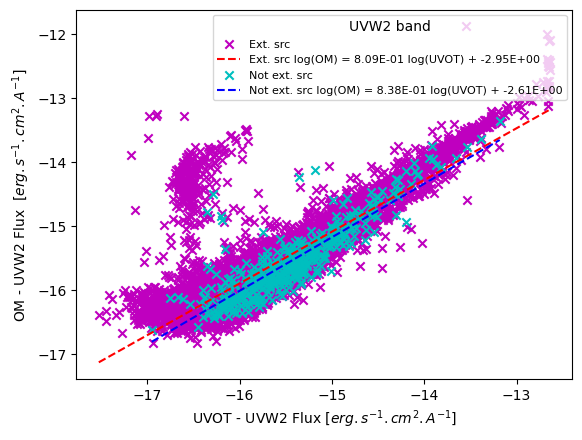

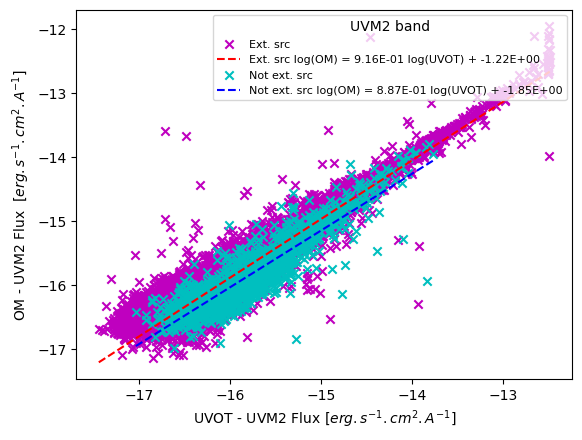

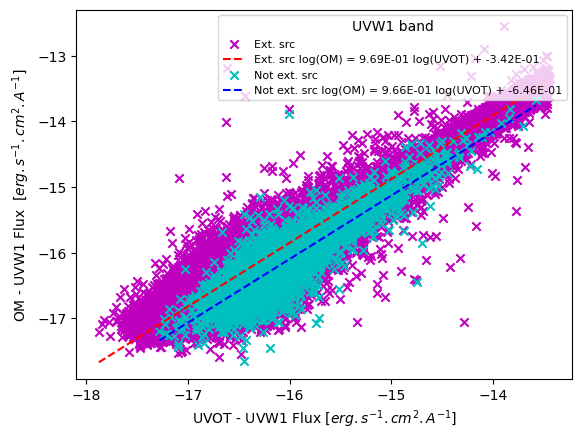

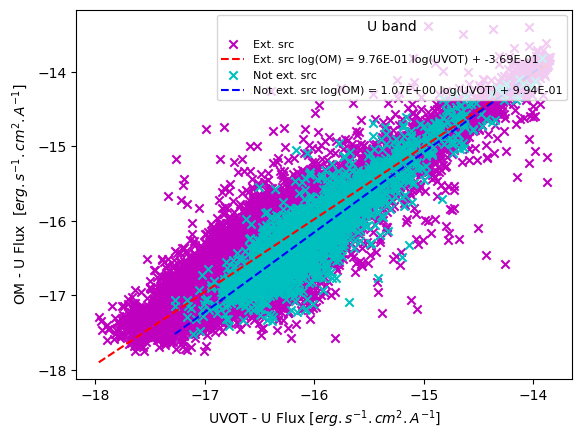

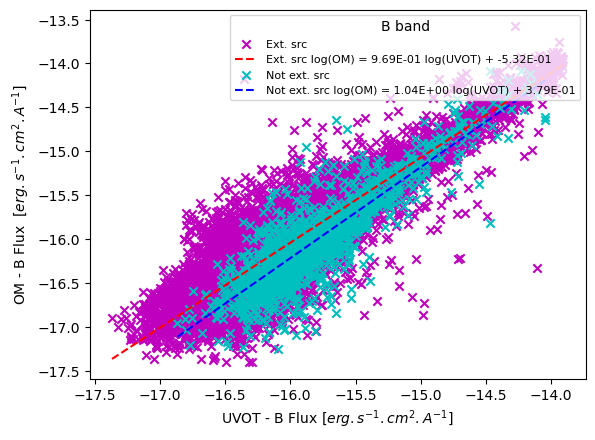

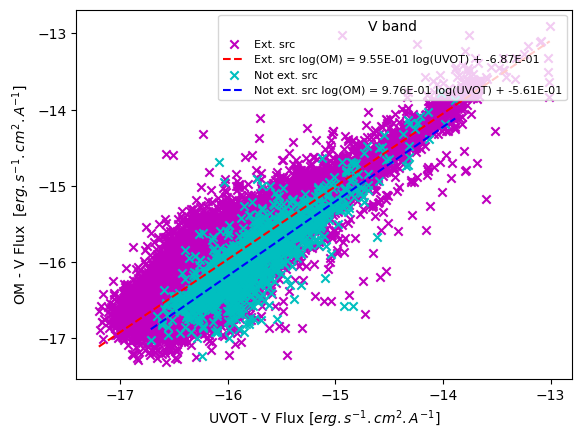

In [36]:
for flux in ['UVW2','UVM2','UVW1','U','B','V']: 
    
    flux_name = flux + '_FLUX'
    flux_err = flux + '_FLUX_ERR'
    flag_extended = flux + '_EXTENDED'
    flux_quality = flux + '_QUALITY_FLAG'

    # Dataframe UVOT for this band
    df_flux_uvot = dat_UVOT[['SRCNUM',flux_name,flux_err,flag_extended, flux_quality]].dropna(subset=[flux_name]).reset_index() 
    ind_minflux = df_flux_uvot.groupby('SRCNUM').agg({flux_err : 'idxmin'})[flux_err]
    df_flux_uvot = df_flux_uvot.loc[ind_minflux,:].rename(columns={flux_name: flux_name + '_UVOT', \
                                                                   flux_err: flux_err + '_UVOT', \
                                                                   flag_extended: flag_extended  + '_UVOT',\
                                                                   flux_quality: flux_quality + '_UVOT',\
                                                                   'SRCNUM': 'SRCNUM_1'})

    # Data frame OM for this band
    df_flux_om = dat_OM[['SRCNUM',flux_name,flux_err]].dropna(subset=[flux_name]).reset_index()        
    ind_minflux = df_flux_om.groupby('SRCNUM').agg({flux_err : 'idxmin'})[flux_err]
    df_flux_om = df_flux_om.loc[ind_minflux,:].rename(columns={flux_name: flux_name + '_OM',\
                                                               flux_err: flux_err + '_OM', \
                                                               'SRCNUM': 'SRCNUM_2'})

    # Merge results
    df_merge = df_match.merge(df_flux_uvot, on='SRCNUM_1').merge(df_flux_om, on='SRCNUM_2')

    # Plot figure
    fig, ax =plt.subplots()
    
    ind_extended = (df_merge[flag_extended+ '_UVOT'] == "False")
    ind_quality = (df_merge[flux_quality + '_UVOT'] == 0)
    
    ind1 = ind_extended & ind_quality 
    ax.scatter(np.log10(df_merge.loc[ind1,flux_name + '_UVOT']), np.log10(df_merge.loc[ind1,flux_name + '_OM']), c='m',marker='x', \
               label='Ext. src')
    z = np.polyfit(np.log10(df_merge.loc[ind1,flux_name + '_UVOT']),np.log10(df_merge.loc[ind1,flux_name + '_OM']), deg=1)
    p = np.poly1d(z)
    xp = np.linspace(np.log10(df_merge.loc[ind1,flux_name + '_UVOT']).min(), np.log10(df_merge.loc[ind1,flux_name + '_UVOT']).max(), 100)
    ax.plot(xp,p(xp), color='r', linestyle='dashed', label= "Ext. src log(OM) = " + 
              "{:.2E}".format(p[1]) + " log(UVOT) + " + "{:.2E}".format(p[0]))

    ind2 = ~ind_extended & ind_quality
    ax.scatter(np.log10(df_merge.loc[ind2,flux_name + '_UVOT']), np.log10(df_merge.loc[ind2,flux_name + '_OM']), c='c',marker='x', \
               label='Not ext. src')
    z = np.polyfit(np.log10(df_merge.loc[ind2,flux_name + '_UVOT']),np.log10(df_merge.loc[ind2,flux_name + '_OM']), deg=1)
    p = np.poly1d(z)
    xp = np.linspace(np.log10(df_merge.loc[ind2,flux_name + '_UVOT']).min(), np.log10(df_merge.loc[ind2,flux_name + '_UVOT']).max(), 100)
    ax.plot(xp,p(xp), color='b', linestyle='dashed', label= "Not ext. src log(OM) = " + 
              "{:.2E}".format(p[1]) + " log(UVOT) + " + "{:.2E}".format(p[0]))
    ax.set_xlabel("UVOT - " + flux + ' Flux [' + "$erg.s^{-1}.cm^{2}.A^{-1}]$")
    ax.set_ylabel("OM - " + flux + ' Flux  [' + "$erg.s^{-1}.cm^{2}.A^{-1}]$")
    ax.legend(loc='upper right',prop={'size': 8},title= flux + " band")
    fig.savefig(roots_tfm + '/Calibration/UVOT_vs_OM_ ' + flux,dpi=1200)        